Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization,Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.regularizers import l2

from keras import optimizers

from tensorflow.keras.datasets import cifar10

In [3]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

#Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [6]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(r"/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path(r"/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [40]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2239 files belonging to 9 classes.


In [38]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_test,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 118 files belonging to 9 classes.


In [41]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

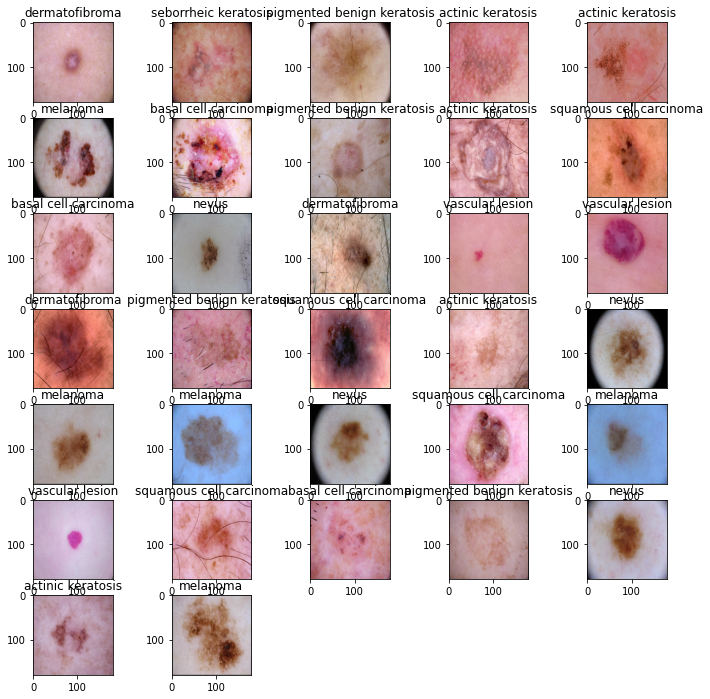

In [14]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(12, 12))
class_names = val_ds.class_names
for images, labels in val_ds.take(1):
    for i in range(32):
        ax = plt.subplot(7, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [16]:
### Your code goes here

rescale = Rescaling(scale=1.0/255)
rescaled_train_ds = train_ds.map(lambda image,label:(rescale(image),label))
rescaled_val_ds = val_ds.map(lambda image,label:(rescale(image),label))

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(180,180,3))) 

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected

# softmax layer
model.add(Dense(9, activation='softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [17]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 495616)            0         
                                                                 
 dense (Dense)               (None, 128)               63438976  
                                                                 
 dense_1 (Dense)             (None, 9)                 1161      
                                                        

### Train the model

In [19]:
epochs = 20
history = model.fit(
  rescaled_train_ds,
  validation_data=rescaled_val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 276s 134ms/step - loss: 2.9670 - accuracy: 0.3385 - val_loss: 2.5346 - val_accuracy: 0.2458
Epoch 2/20
70/70 [==============================] - 5s 71ms/step - loss: 1.5447 - accuracy: 0.4533 - val_loss: 2.5221 - val_accuracy: 0.2458
Epoch 3/20
70/70 [==============================] - 5s 71ms/step - loss: 1.3327 - accuracy: 0.5351 - val_loss: 2.7570 - val_accuracy: 0.3729
Epoch 4/20
70/70 [==============================] - 5s 71ms/step - loss: 1.2313 - accuracy: 0.5668 - val_loss: 2.5305 - val_accuracy: 0.3729
Epoch 5/20
70/70 [==============================] - 5s 71ms/step - loss: 1.0260 - accuracy: 0.6373 - val_loss: 2.8926 - val_accuracy: 0.3644
Epoch 6/20
70/70 [==============================] - 5s 71ms/step - loss: 0.8382 - accuracy: 0.7092 - val_loss: 2.7882 - val_accuracy: 0.3220
Epoch 7/20
70/70 [==============================] - 5s 72ms/step - loss: 0.6320 - accuracy: 0.7820 - val_loss: 3.1941 - val_accuracy: 0.3051
Epoch 8/20

### Visualizing training results

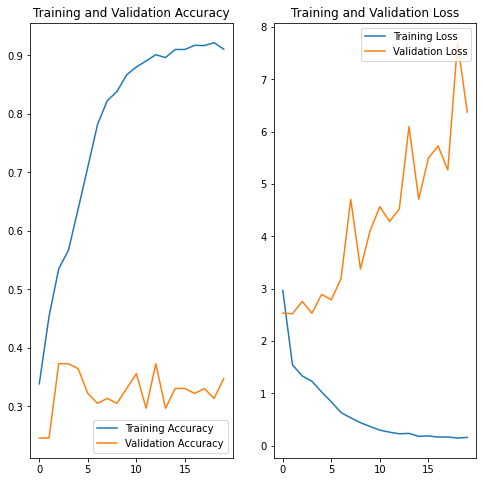

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

- Model is overfitting. For train data-set, accuracy is increasing but pwerformance for test data-set is not good.

## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here



In [31]:
# model= Sequential()
# model.add(Conv2D(32, kernel_size=(5, 5),
#                  activation='relu',
#                  input_shape=(180,180,3))) 

# # second conv layer
# model.add(Conv2D(64, kernel_size=(5, 5), 
#                  activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# # third conv layer
# model.add(Conv2D(128, kernel_size=(5, 5), 
#                  activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))


# # fourth conv layer
# model.add(Conv2D(256, kernel_size=(5, 5), 
#                  activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

# # model.add(Conv2D(512, kernel_size=(5, 5), 
# #                  activation='relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.75))

# # flatten and put a fully connected layer
# model.add(Flatten())
# model.add(Dense(2048, kernel_regularizer = l2(0.01), activation='relu')) # fully connected

# # softmax layer
# model.add(Dense(9, activation='softmax'))


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(180,180,3))) 

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(9, activation='softmax'))

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 conv2d_12 (Conv2D)          (None, 176, 176, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 88, 88, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 88, 88, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 495616)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               63438976  
                                                      

### Compiling the model

In [34]:
epochs = 20
history = model.fit(
  rescaled_train_ds,
  validation_data=rescaled_val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 6s 78ms/step - loss: 5.4635 - accuracy: 0.2403 - val_loss: 2.2244 - val_accuracy: 0.1695
Epoch 2/20
70/70 [==============================] - 5s 77ms/step - loss: 1.8860 - accuracy: 0.3292 - val_loss: 2.2448 - val_accuracy: 0.2034
Epoch 3/20
70/70 [==============================] - 5s 77ms/step - loss: 1.7909 - accuracy: 0.3631 - val_loss: 2.6579 - val_accuracy: 0.2458
Epoch 4/20
70/70 [==============================] - 5s 78ms/step - loss: 1.7443 - accuracy: 0.4015 - val_loss: 2.6082 - val_accuracy: 0.2797
Epoch 5/20
70/70 [==============================] - 5s 78ms/step - loss: 1.6289 - accuracy: 0.4377 - val_loss: 2.4952 - val_accuracy: 0.1780
Epoch 6/20
70/70 [==============================] - 5s 77ms/step - loss: 1.5408 - accuracy: 0.4556 - val_loss: 2.8826 - val_accuracy: 0.2627
Epoch 7/20
70/70 [==============================] - 5s 77ms/step - loss: 1.3698 - accuracy: 0.5190 - val_loss: 2.3350 - val_accuracy: 0.2966
Epoch 8/20
70

In [1]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes hereacc = history.history['accuracy']

### Todo:
### Create the model, compile and train the model


### Training the model

### Visualizing the results

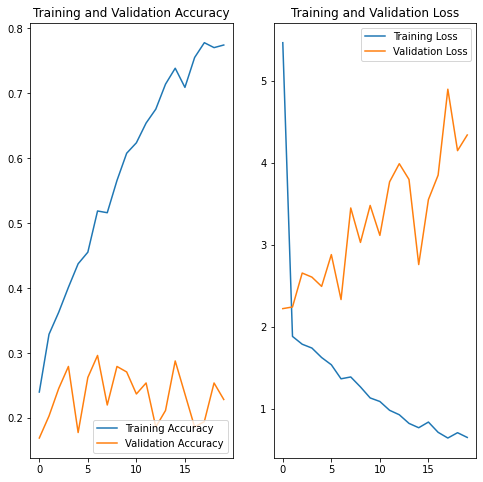

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

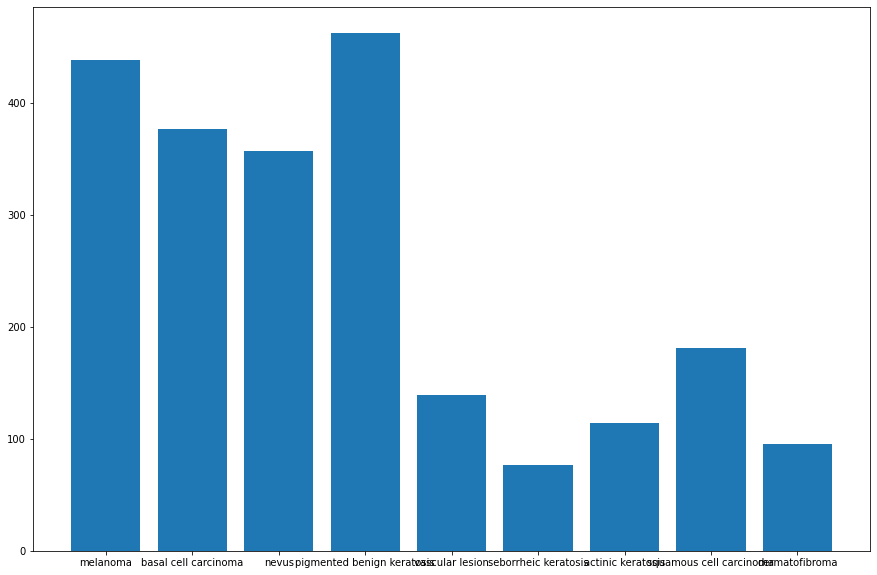

In [45]:
import numpy
from collections import Counter
names = {i:j for i,j in enumerate(train_ds.class_names)}
samples = Counter([i for j in [list(numpy.array(i)) for j,i in train_ds] for i in j])
dict_class = {names[key]:val for key, val in samples.items()}
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.bar(dict_class.keys(), dict_class.values())

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples? - seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples? - pigmented benign keratosis


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [46]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [47]:
path_to_training_dataset=r"/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8ADC49C950>: 100%|██████████| 500/500 [00:18<00:00, 26.79 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8AD8213F90>: 100%|██████████| 500/500 [00:18<00:00, 27.19 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8AD81D0310>: 100%|██████████| 500/500 [00:18<00:00, 26.92 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F8ADC4BB6D0>: 100%|██████████| 500/500 [01:30<00:00,  5.52 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F8AD821A190>: 100%|██████████| 500/500 [01:31<00:00,  5.46 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8AD856EC50>: 100%|██████████| 500/500 [00:18<00:00, 26.55 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F8ADCEE7350>: 100%|██████████| 500/500 [00:42<00:00, 11.90 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8ADCDF9D10>: 100%|██████████| 500/500 [00:18<00:00, 26.66 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8ADD360110>: 100%|██████████| 500/500 [00:18<00:00, 26.33 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [48]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [50]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list = [x for x in glob(os.path.join(data_dir_train,'*','*.jpg'))]

In [51]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new
lesion_list_old = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

In [52]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
dataframe_dict_old = dict(zip(path_list, lesion_list_old))

In [53]:
new_df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
original_df = pd.DataFrame(list(dataframe_dict_old.items()),columns = ['Path','Label'])
new_df2 = original_df.append(new_df)

In [54]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

In [55]:
new_df['Label'].value_counts()

dermatofibroma                500
basal cell carcinoma          500
actinic keratosis             500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [56]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [57]:
data_dir_train=r"/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size = (img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [58]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [59]:
### Your code goes here
rescale = Rescaling(scale=1.0/255)
rescaled_train_dataset = train_ds.map(lambda image,label:(rescale(image),label))
rescaled_val_dataset = val_ds.map(lambda image,label:(rescale(image),label))

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(180,180,3))) # input shape = (img_rows, img_cols, 1)

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third conv layer
model.add(Conv2D(128, kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(256, activation='relu')) # fully connected
model.add(Dropout(0.75))

# softmax layer
model.add(Dense(9, activation='softmax'))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [60]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [61]:
epochs = 30
history = model.fit(
  rescaled_train_dataset,
  validation_data=rescaled_val_dataset,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 40s 225ms/step - loss: 2.4796 - accuracy: 0.1493 - val_loss: 2.0037 - val_accuracy: 0.2324
Epoch 2/30
169/169 [==============================] - 35s 200ms/step - loss: 1.9257 - accuracy: 0.2845 - val_loss: 1.8481 - val_accuracy: 0.3177
Epoch 3/30
169/169 [==============================] - 35s 202ms/step - loss: 1.7121 - accuracy: 0.3626 - val_loss: 1.5260 - val_accuracy: 0.4291
Epoch 4/30
169/169 [==============================] - 36s 207ms/step - loss: 1.6154 - accuracy: 0.3980 - val_loss: 1.4395 - val_accuracy: 0.4536
Epoch 5/30
169/169 [==============================] - 34s 196ms/step - loss: 1.5629 - accuracy: 0.4110 - val_loss: 1.4888 - val_accuracy: 0.4491
Epoch 6/30
169/169 [==============================] - 34s 195ms/step - loss: 1.4640 - accuracy: 0.4497 - val_loss: 1.3782 - val_accuracy: 0.4640
Epoch 7/30
169/169 [==============================] - 34s 196ms/step - loss: 1.4122 - accuracy: 0.4807 - val_loss: 1.2863 - val_ac

#### **Todo:**  Visualize the model results

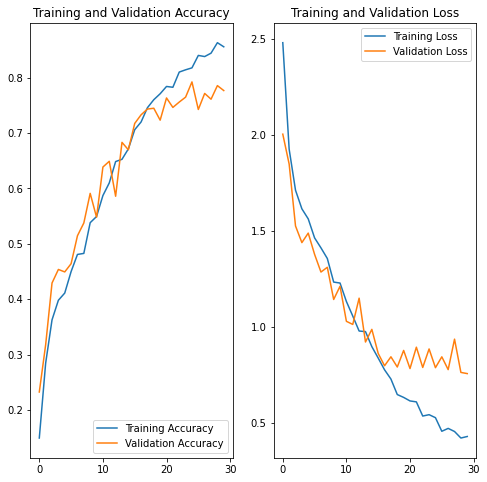

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
Yes